In [1]:
# reference: Marcin Myczka
# link: https://www.kaggle.com/code/marcinmyczka/template-2-exploring-data-with-charts

In [5]:
# Template 2 - Exploring data with charts
# This template shows how to use different chart types to represent and interpret data visually.

# Preparing data for analysis. 

import numpy as np
import pandas as pd

# Specifying columns to read
columns_to_read = ['Country', 'Co2-Emissions', 'Life expectancy', 'Population', 'GDP', 'Physicians per thousand', 'Gasoline Price', 'Abbreviation']
continents_to_read = ['name', 'alpha-2', 'region']

# Read the CSV file with selected columns
countries = pd.read_csv('./world-data-2023.csv', usecols = columns_to_read)
continents = pd.read_csv('./continents2.csv', usecols = continents_to_read)

# Merge two tables on 'Abbreviation' and 'alpha-2'
data = pd.merge(countries, continents, left_on=['Abbreviation'], right_on=['alpha-2'], how='left')

# Drop redundant columns
data.drop(['name', 'alpha-2'], axis=1, inplace=True)
data.rename(columns={'region': 'Region'}, inplace=True)

data = data.dropna()

# Convert 'Population' to numeric (remove commas)
data['Population'] = data['Population'].str.replace(',', '').astype(int)
# Convert 'GDP' to numeric (remove $ and commas)
# data['GDP'] = data['GDP'].str.replace('$', '').str.replace(',', '').astype(int)
data['GDP'] = data['GDP'].str.replace('$', '').str.replace(',', '').astype('Int64')

# Convert 'Co2-Emissions' to numeric (remove commas)
data['Co2-Emissions'] = data['Co2-Emissions'].str.replace(',', '').astype(int)
# Convert 'Gasoline Price' to numeric (remove $ and commas)
data['Gasoline Price'] = data['Gasoline Price'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate CO2 emissions per million people
data['Co2-Emissions per million people'] = (data['Co2-Emissions'] / data['Population']) * 1000000
# Calculate GDP per capita
data['GDP per capita'] = data['GDP'] / data['Population']

# Viewing sample data
data.head()

,Country,Abbreviation,Co2-Emissions,Gasoline Price,GDP,Life expectancy,Physicians per thousand,Population,Region,Co2-Emissions per million people,GDP per capita
0,Afghanistan,AF,8672,0.70,19101353833,64.5,0.28,38041754,Asia,227.960046,502.115487
1,Albania,AL,4536,1.36,15278077447,78.5,1.20,2854191,Europe,1589.241925,5352.857411
2,Algeria,DZ,150006,0.28,169988236398,76.7,1.72,43053054,Africa,3484.212758,3948.343279
4,Angola,AO,34693,0.97,94635415870,60.8,0.21,31825295,Africa,1090.107727,2973.59116
5,Antigua and Barbuda,AG,557,0.99,1727759259,76.9,2.76,97118,Americas,5735.291089,17790.309304


In [6]:
data.describe()

,Co2-Emissions,Gasoline Price,GDP,Life expectancy,Physicians per thousand,Population,Co2-Emissions per million people,GDP per capita
count,1.680000e+02,168.000000,168.0,168.000000,168.000000,1.680000e+02,168.000000,168.0
mean,1.986341e+05,0.992857,545479726932.119019,72.547024,1.885655,4.528081e+07,4397.496057,14148.473414
std,8.852774e+05,0.355831,2321145151856.65332,7.390582,1.650928,1.551359e+08,5551.919512,19155.386625
min,1.430000e+02,0.000000,221278000.0,52.800000,0.010000,5.879100e+04,23.285941,261.247473
25%,4.970250e+03,0.747500,14156310007.0,67.250000,0.365000,3.665286e+06,729.689513,1814.519653
50%,1.895500e+04,0.980000,51742709149.5,74.100000,1.585000,1.069302e+07,2490.568909,5978.254912
75%,8.731925e+04,1.212500,272150440960.0,77.650000,2.982500,3.277800e+07,5774.513024,17404.926411
max,9.893038e+06,2.000000,21427700000000.0,84.200000,8.420000,1.397715e+09,36460.648706,110172.373141


In [7]:
data.shape

(168, 11)

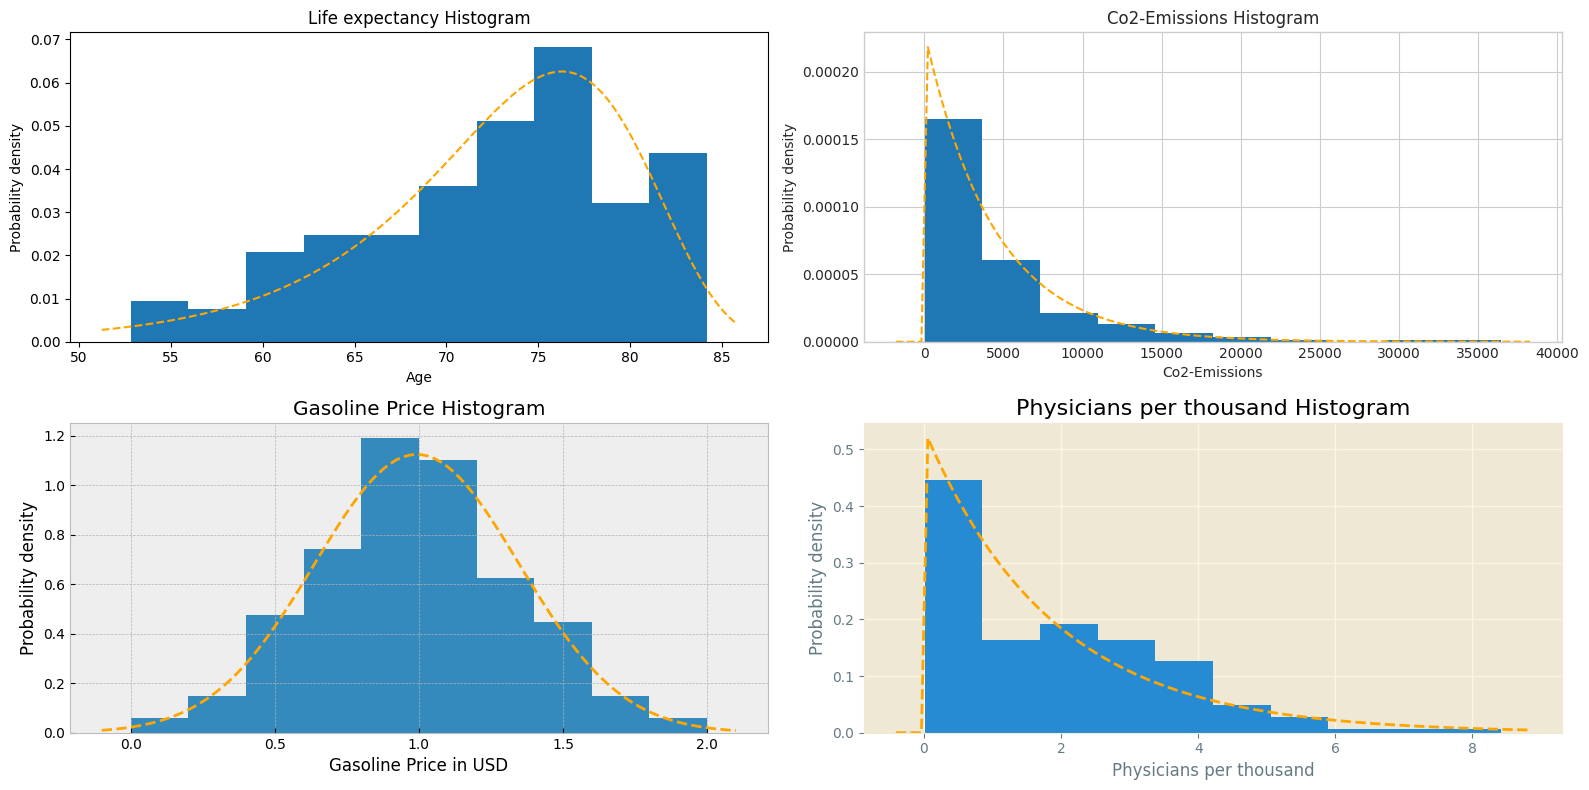

In [11]:
# 1. Histogram
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import loggamma

# Create a 2x2 grid
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 2)

# Define style contexts
style_contexts = ['default', 'seaborn-v0_8-whitegrid', 'bmh', 'Solarize_Light2']

# Define histogram chart
def hist_chart(data, distribution):
    # Create histogram
    plt.hist(data, bins=10, density = True)
    
    # Define x range
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    #Fit distribution
    if distribution == 'norm':       
        # Fit a normal distribution to the data
        mu, std = norm.fit(data)
        pdf = norm.pdf(x, mu, std)
    elif distribution == 'expon':
        # Fit exponential distribution to the data
        loc, scale = expon.fit(data)
        pdf = expon.pdf(x, loc, scale)
    elif distribution == 'loggamma':
        # Fit loggamma distribution to the data
        shape, loc, scale = loggamma.fit(data)
        pdf = loggamma.pdf(x, shape, loc, scale)
        
    # Plot the fitted distribution
    plt.plot(x, pdf, 'orange', linestyle='--') 

    
# Create Histograms

# i) Life expectancy Histogram
with plt.style.context(style_contexts[0]):
    fig.add_subplot(gs[0,0])
    hist_chart(data['Life expectancy'], 'loggamma')
    plt.title('Life expectancy Histogram')
    plt.xlabel('Age')
    plt.ylabel('Probability density')    
    
# ii) Co2-Emissions per million people Histogram
with plt.style.context(style_contexts[1]):
    fig.add_subplot(gs[0,1])
    hist_chart(data['Co2-Emissions per million people'], 'expon')
    plt.title('Co2-Emissions Histogram')
    plt.xlabel('Co2-Emissions')
    plt.ylabel('Probability density')
    
# iii) Gasoline Price Histogram
with plt.style.context(style_contexts[2]):
    fig.add_subplot(gs[1,0])
    hist_chart(data['Gasoline Price'], 'norm')
    plt.title('Gasoline Price Histogram')
    plt.xlabel('Gasoline Price in USD')
    plt.ylabel('Probability density')
    
# iv) Physicians per thousand Histogram
with plt.style.context(style_contexts[3]):
    fig.add_subplot(gs[1,1])
    hist_chart(data['Physicians per thousand'], 'expon')
    plt.title('Physicians per thousand Histogram')
    plt.xlabel('Physicians per thousand')
    plt.ylabel('Probability density')

# Adjust layout
plt.tight_layout()

# Show the charts
plt.show() 


In [ ]:
# same graphs with altair
import pandas as pd
import numpy as np
import altair as alt
from scipy.stats import norm, expon, loggamma


# Helper function to calculate fitted distribution
def get_distribution_data(data, distribution_type):
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    
    if distribution_type == 'norm':
        mu, std = norm.fit(data)
        y = norm.pdf(x, mu, std)
    elif distribution_type == 'expon':
        loc, scale = expon.fit(data)
        y = expon.pdf(x, loc, scale)
    elif distribution_type == 'loggamma':
        shape, loc, scale = loggamma.fit(data)
        y = loggamma.pdf(x, shape, loc, scale)
    else:
        raise ValueError("Unsupported distribution type!")
    
    return pd.DataFrame({'x': x, 'y': y})

# Histogram 1: Life Expectancy
life_expectancy = data['Life expectancy'].dropna()
life_expectancy_fit = get_distribution_data(life_expectancy, 'loggamma')

hist_life_expectancy = alt.Chart(pd.DataFrame({'value': life_expectancy})).mark_bar(opacity=0.5).encode(
    alt.X('value:Q', bin=alt.Bin(maxbins=10), title='Age'),
    alt.Y('count()', title='Count')
).properties(
    title='Life Expectancy Histogram'
)

fit_life_expectancy = alt.Chart(life_expectancy_fit).mark_line(color='orange').encode(
    x='x:Q',
    y='y:Q'
)

chart1 = hist_life_expectancy + fit_life_expectancy

# Histogram 2: CO2 Emissions per Million People
co2_emissions = data['Co2-Emissions'].dropna()
co2_emissions_fit = get_distribution_data(co2_emissions, 'expon')

hist_co2_emissions = alt.Chart(pd.DataFrame({'value': co2_emissions})).mark_bar(opacity=0.5).encode(
    alt.X('value:Q', bin=alt.Bin(maxbins=10), title='CO2 Emissions'),
    alt.Y('count()', title='Count')
).properties(
    title='CO2 Emissions Histogram'
)

fit_co2_emissions = alt.Chart(co2_emissions_fit).mark_line(color='orange').encode(
    x='x:Q',
    y='y:Q'
)

chart2 = hist_co2_emissions + fit_co2_emissions

# Histogram 3: Gasoline Price
gasoline_price = data['Gasoline Price'].dropna()
gasoline_price_fit = get_distribution_data(gasoline_price, 'norm')

hist_gasoline_price = alt.Chart(pd.DataFrame({'value': gasoline_price})).mark_bar(opacity=0.5).encode(
    alt.X('value:Q', bin=alt.Bin(maxbins=10), title='Gasoline Price (USD)'),
    alt.Y('count()', title='Count')
).properties(
    title='Gasoline Price Histogram'
)

fit_gasoline_price = alt.Chart(gasoline_price_fit).mark_line(color='orange').encode(
    x='x:Q',
    y='y:Q'
)

chart3 = hist_gasoline_price + fit_gasoline_price

# Histogram 4: Physicians per Thousand
physicians_per_thousand = data['Physicians per thousand'].dropna()
physicians_per_thousand_fit = get_distribution_data(physicians_per_thousand, 'expon')

hist_physicians = alt.Chart(pd.DataFrame({'value': physicians_per_thousand})).mark_bar(opacity=0.5).encode(
    alt.X('value:Q', bin=alt.Bin(maxbins=10), title='Physicians per Thousand'),
    alt.Y('count()', title='Count')
).properties(
    title='Physicians per Thousand Histogram'
)

fit_physicians = alt.Chart(physicians_per_thousand_fit).mark_line(color='orange').encode(
    x='x:Q',
    y='y:Q'
)

chart4 = hist_physicians + fit_physicians

# Combine charts in a 2x2 grid
final_chart = alt.vconcat(
    alt.hconcat(chart1, chart2),
    alt.hconcat(chart3, chart4)
).resolve_scale(
    color='independent'
).properties(
    title="Histograms with Fitted Distributions (Altair)"
)

final_chart.show()


alt.VConcatChart(...)

In [19]:
# 2. Scatter plot
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Scatter Plot of GDP per capita vs Life expectancy
fig_1 = px.scatter(data, x='GDP per capita', y='Life expectancy', hover_name='Country', color='Region', template = 'plotly',
                    size='Population',size_max=60, title='Scatter Plot of GDP per capita vs Life expectancy', log_x=True)

# Scatter Plot of GDP per capita vs Co2-Emissions per million people
fig_2 = px.scatter(data, x='GDP per capita', y='Co2-Emissions per million people', hover_name='Country', color='Region', template='ggplot2',
                    size='Population',size_max=60, title='Scatter Plot of GDP per capita vs Co2-Emissions per million people', log_x=True, log_y=True)

# Show charts
fig_1.show()
fig_2.show()


In [20]:
# same graphs with altair
import altair as alt
import pandas as pd

# Assuming `data` is your cleaned DataFrame

# Scatter Plot 1: GDP per Capita vs Life Expectancy
scatter_gdp_life = alt.Chart(data).mark_circle().encode(
    x=alt.X('GDP per capita:Q', scale=alt.Scale(type='log'), title='GDP per Capita (Log Scale)'),
    y=alt.Y('Life expectancy:Q', title='Life Expectancy'),
    size=alt.Size('Population:Q', scale=alt.Scale(range=[10, 100]), title='Population'),
    color=alt.Color('Region:N', legend=alt.Legend(title="Region")),
    tooltip=['Country:N', 'GDP per capita:Q', 'Life expectancy:Q', 'Population:Q']
).properties(
    title='Scatter Plot of GDP per Capita vs Life Expectancy',
    width=600,
    height=400
).interactive()

# Scatter Plot 2: GDP per Capita vs CO2 Emissions
scatter_gdp_co2 = alt.Chart(data).mark_circle().encode(
    x=alt.X('GDP per capita:Q', scale=alt.Scale(type='log'), title='GDP per Capita (Log Scale)'),
    y=alt.Y('Co2-Emissions per million people:Q', scale=alt.Scale(type='log'), title='CO2 Emissions per Million People (Log Scale)'),
    size=alt.Size('Population:Q', scale=alt.Scale(range=[10, 100]), title='Population'),
    color=alt.Color('Region:N', legend=alt.Legend(title="Region")),
    tooltip=['Country:N', 'GDP per capita:Q', 'Co2-Emissions per million people:Q', 'Population:Q']
).properties(
    title='Scatter Plot of GDP per Capita vs CO2 Emissions per Million People',
    width=600,
    height=400
).interactive()

# Display both charts
scatter_gdp_life & scatter_gdp_co2


alt.VConcatChart(...)

In [14]:
# 3. Heatmap
# !pip install seaborn
import seaborn as sns

# Correlation matrix
# Remove string data
corr_data = data.drop(columns=['Country','Abbreviation','Region'])
corr_matrix = corr_data.corr()
corr_matrix

,Co2-Emissions,Gasoline Price,GDP,Life expectancy,Physicians per thousand,Population,Co2-Emissions per million people,GDP per capita
Co2-Emissions,1.000000,-0.068370,0.916452,0.118969,0.051960,0.808846,0.162252,0.122478
Gasoline Price,-0.068370,1.000000,-0.015663,0.207519,0.214098,-0.067203,-0.251349,0.287392
GDP,0.916452,-0.015663,1.000000,0.178570,0.092027,0.629414,0.193303,0.250594
Life expectancy,0.118969,0.207519,0.178570,1.000000,0.694479,0.000042,0.463425,0.656078
Physicians per thousand,0.051960,0.214098,0.092027,0.694479,1.000000,-0.061287,0.412245,0.515133
Population,0.808846,-0.067203,0.629414,0.000042,-0.061287,1.000000,-0.000570,-0.032219
Co2-Emissions per million people,0.162252,-0.251349,0.193303,0.463425,0.412245,-0.000570,1.000000,0.579773
GDP per capita,0.122478,0.287392,0.250594,0.656078,0.515133,-0.032219,0.579773,1.000000


<Axes: >

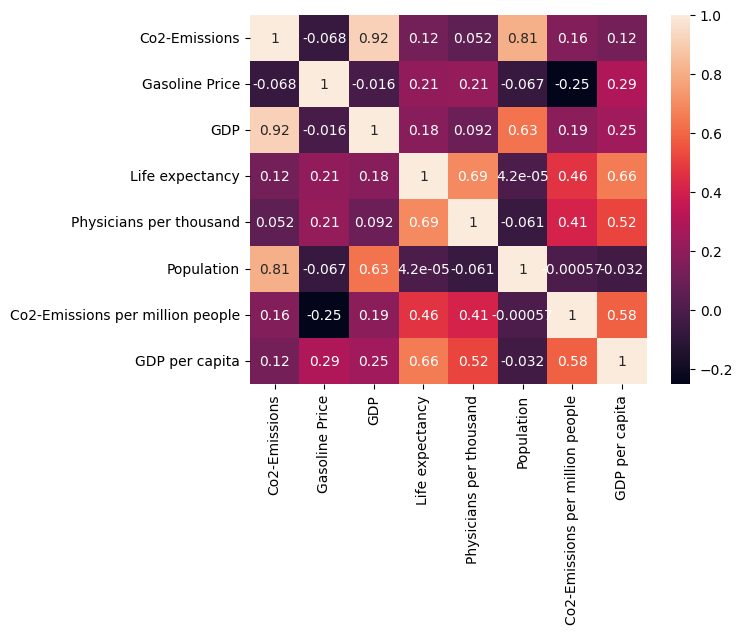

In [15]:
# Create Heatmap chart
sns.heatmap(corr_matrix, annot=True)

In [21]:
# same with altair
import altair as alt
import pandas as pd

# Calculate the correlation matrix
corr_data = data.drop(columns=['Country', 'Abbreviation', 'Region'])  # Drop non-numeric columns
corr_matrix = corr_data.corr()

# Transform the correlation matrix into a long-form dataframe for Altair
corr_matrix_long = corr_matrix.reset_index().melt(id_vars='index', var_name='Variable 2', value_name='Correlation')
corr_matrix_long.rename(columns={'index': 'Variable 1'}, inplace=True)

# Create Heatmap Chart
heatmap = alt.Chart(corr_matrix_long).mark_rect().encode(
    x=alt.X('Variable 1:N', sort=None, title='Variable 1'),
    y=alt.Y('Variable 2:N', sort=None, title='Variable 2'),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='viridis'), title='Correlation'),
    tooltip=['Variable 1:N', 'Variable 2:N', 'Correlation:Q']
).properties(
    width=600,
    height=600,
    title='Heatmap of Correlation Matrix'
)

# Add text annotations
text = alt.Chart(corr_matrix_long).mark_text(size=10).encode(
    x=alt.X('Variable 1:N', sort=None),
    y=alt.Y('Variable 2:N', sort=None),
    text=alt.Text('Correlation:Q', format=".2f"),
    color=alt.condition(
        alt.datum.Correlation > 0.5, 
        alt.value('black'),  # Text color for strong positive correlations
        alt.value('white')  # Text color for weak or negative correlations
    )
)

# Combine heatmap and text
heatmap + text


alt.LayerChart(...)

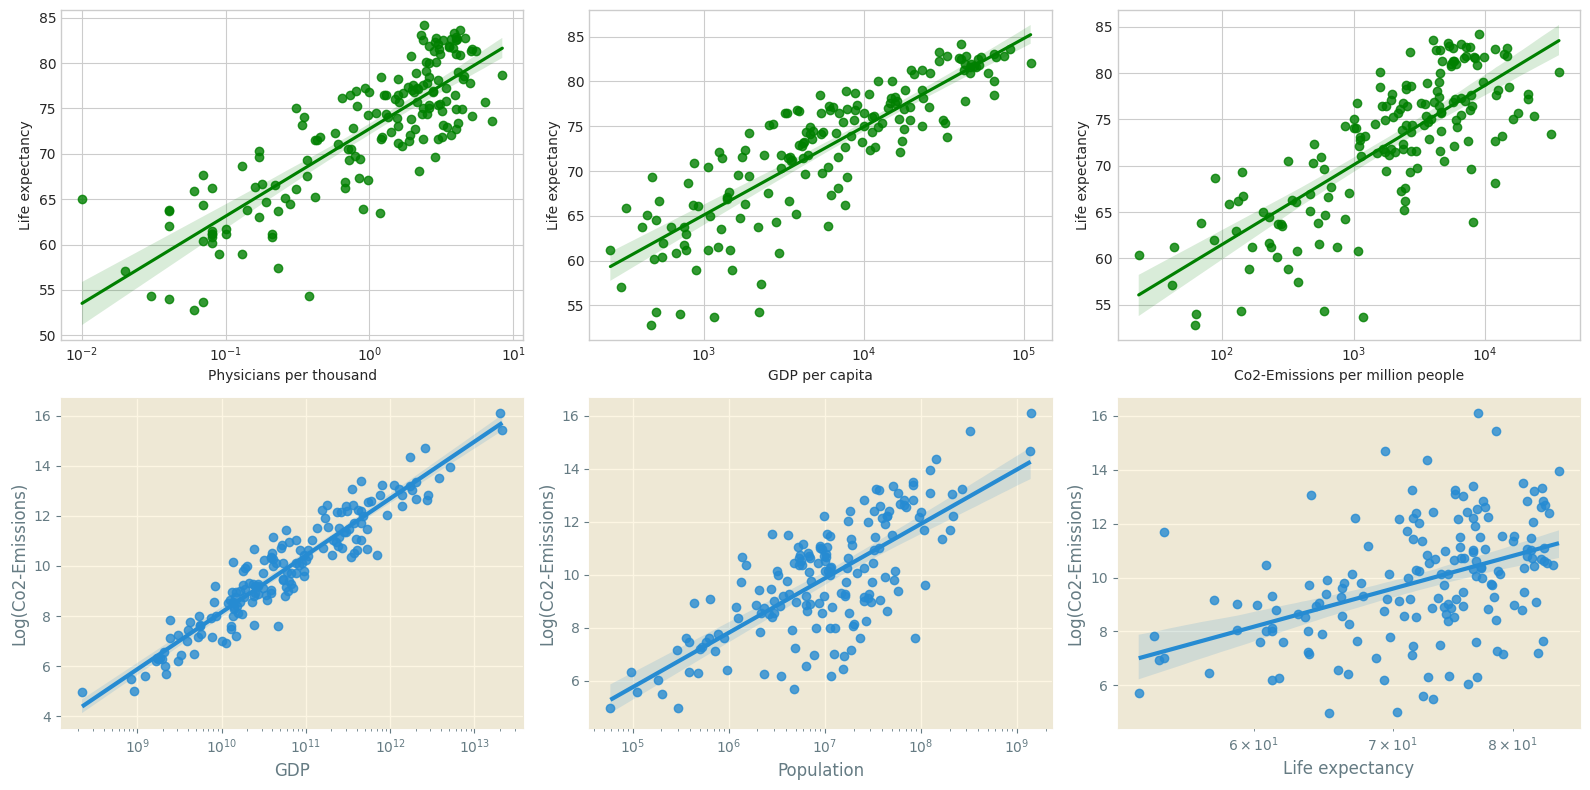

In [16]:
# 4. Scatter chart with a regression line fitted to the data points

# Create a 2x3 grid
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 3)


oy = data['Life expectancy']
ox = ['Physicians per thousand', 'GDP per capita', 'Co2-Emissions per million people']

with plt.style.context('seaborn-v0_8-whitegrid'):
    for i, column in enumerate(ox):
        # Scatter chart of Life expectancy vs current column
        ax = fig.add_subplot(gs[0, i])
        sns.regplot(x=data[column], y=oy, ax=ax, logx=True, color='green')
        ax.set_xscale('log')
        
    
oy = np.log(data['Co2-Emissions'])
ox = ['GDP', 'Population', 'Life expectancy']

with plt.style.context('Solarize_Light2'):
    for i, column in enumerate(ox):
        # Scatter chart of Co2-Emissions vs current column
        ax = fig.add_subplot(gs[1, i])
        sns.regplot(x=data[column], y=oy, ax=ax, logx=True)
        ax.set_xscale('log')
        ax.set_ylabel('Log(Co2-Emissions)')

plt.tight_layout()
plt.show()

In [22]:
import altair as alt
import numpy as np
import pandas as pd

# Log-transform the required columns
data['Log(Co2-Emissions)'] = np.log(data['Co2-Emissions'])

# Scatter Chart of 'Life expectancy' vs ['Physicians per thousand', 'GDP per capita', 'Co2-Emissions per million people']
charts1 = []
for column in ['Physicians per thousand', 'GDP per capita', 'Co2-Emissions per million people']:
    chart = alt.Chart(data).mark_point(color='green').encode(
        x=alt.X(column, scale=alt.Scale(type='log'), title=f'{column} (Log Scale)'),
        y=alt.Y('Life expectancy', title='Life Expectancy'),
        tooltip=['Country', column, 'Life expectancy']
    ).properties(
        title=f'Life Expectancy vs {column}',
        width=250,
        height=200
    )
    
    # Add regression line
    regression_line = chart.transform_regression(
        column, 'Life expectancy', method='linear'
    ).mark_line(color='red')
    
    # Combine the scatter plot and regression line
    charts1.append(chart + regression_line)

# Combine all scatter charts into a row
grid1 = alt.hconcat(*charts1)

# Scatter Chart of 'Log(Co2-Emissions)' vs ['GDP', 'Population', 'Life expectancy']
charts2 = []
for column in ['GDP', 'Population', 'Life expectancy']:
    chart = alt.Chart(data).mark_point(color='blue').encode(
        x=alt.X(column, scale=alt.Scale(type='log'), title=f'{column} (Log Scale)'),
        y=alt.Y('Log(Co2-Emissions)', title='Log(Co2-Emissions)'),
        tooltip=['Country', column, 'Log(Co2-Emissions)']
    ).properties(
        title=f'Log(Co2-Emissions) vs {column}',
        width=250,
        height=200
    )
    
    # Add regression line
    regression_line = chart.transform_regression(
        column, 'Log(Co2-Emissions)', method='linear'
    ).mark_line(color='red')
    
    # Combine the scatter plot and regression line
    charts2.append(chart + regression_line)

# Combine all scatter charts into a row
grid2 = alt.hconcat(*charts2)

# Combine both grids into a vertical layout
final_chart = alt.vconcat(grid1, grid2).properties(
    title='Scatter Charts with Regression Lines'
)

final_chart


alt.VConcatChart(...)